In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(2021)
mu = 0 
sigma = 1 
n = 100 
# assumed population parameters
alpha = np.repeat(0.5, n)
beta = 1.5

def MC_estimation_slope(M):
    MC_betas = []
    MC_samples = {}

    for i in range(M):
        # randomly sampling from normal distribution as error terms
        e = np.random.normal(mu, sigma, n)
        # generating independent variable by making sure the variance in X is larger than the variance in error terms
        X = 9 * np.random.normal(mu, sigma, n)
        # population distribution using the assumd parameter values alpha/beta
        Y = (alpha + beta * X + e)
        
        # running OLS regression for getting slope parameters
        model = sm.OLS(Y.reshape((-1, 1)), X.reshape((-1, 1)))
        ols_result = model.fit()
        coeff = ols_result.params
        
        MC_samples[i] = Y
        MC_betas.append(coeff)
    MC_beta_hats = np.array(MC_betas).flatten()
    return(MC_samples, MC_beta_hats)
    
MC_samples, MC_beta_hats = MC_estimation_slope(M = 10000)
beta_hat_MC = np.mean(MC_beta_hats)

In [3]:
MC_beta_hats

array([1.49450864, 1.47494779, 1.50035304, ..., 1.50746915, 1.49457376,
       1.49608805])

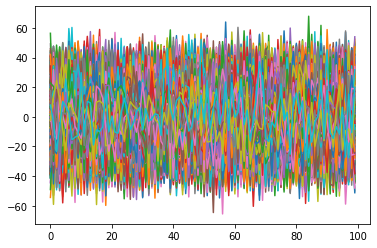

In [12]:
for samples in MC_samples.values():
    plt.plot(samples)
plt.show()

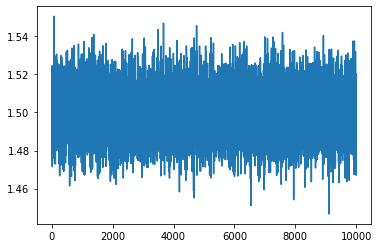

In [8]:
plt.plot(MC_beta_hats)

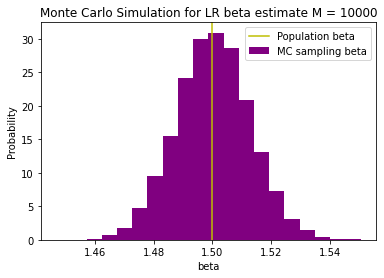

In [5]:
counts, bins, ignored  = plt.hist(MC_beta_hats, 20, density = True, color = 'purple', label = 'MC sampling beta')
plt.title("Monte Carlo Simulation for LR beta estimate M = 10000")
plt.axvline(beta, 0,40, color = 'y', label = 'Population beta')
plt.xlabel("beta")
plt.ylabel("Probability")
plt.legend()
plt.show()

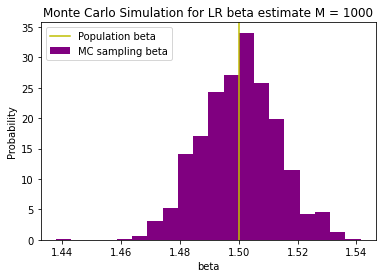

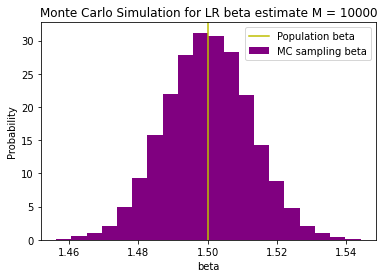

In [13]:
MC_samples1000, MC_beta_hats1000 = MC_estimation_slope(M = 1000)
MC_samples10000, MC_beta_hats10000 = MC_estimation_slope(M = 10000)

# MC with M = 1000
counts, bins, ignored  = plt.hist(MC_beta_hats1000, 20, density = True, color = 'purple', label = 'MC sampling beta')
plt.title("Monte Carlo Simulation for LR beta estimate M = 1000")
plt.axvline(beta, 0,40, color = 'y', label = 'Population beta')
plt.xlabel("beta")
plt.ylabel("Probability")
plt.legend()
plt.show()

# MC with M = 10000
counts, bins, ignored  = plt.hist(MC_beta_hats10000, 20, density = True, color = 'purple', label = 'MC sampling beta')
plt.title("Monte Carlo Simulation for LR beta estimate M = 10000")
plt.axvline(beta, 0,40, color = 'y', label = 'Population beta')
plt.xlabel("beta")
plt.ylabel("Probability")
plt.legend()
plt.show()